In [1]:
import cv2     # Thư viện OpenCV
import numpy as np   # Thư viện numy để làm việc dữ liệu kiểu mảng
import matplotlib.pyplot as plt # import thư viện matplotlib để vẽ ảnh

In [2]:
def Tich_chap(img,mask):
    m, n = img.shape
    img_new = np.zeros([m, n])
    for i in range(1, m-1):
        for j in range(1, n-1):
            temp   =  img[i-1, j-1]    * mask[0, 0]\
                   +  img[i-1, j]      * mask[0, 1]\
                   +  img[i-1, j + 1]  * mask[0, 2]\
                   +  img[i, j-1]      * mask[1, 0]\
                   +  img[i, j]        * mask[1, 1]\
                   +  img[i, j + 1]    * mask[1, 2]\
                   +  img[i + 1, j-1]  * mask[2, 0]\
                   +  img[i + 1, j]    * mask[2, 1]\
                   +  img[i + 1, j + 1]* mask[2, 2]
            img_new[i, j]= temp
    img_new = img_new.astype(np.uint8)
    return img_new

In [3]:
# Định nghĩa bộ lọc trung bình
locTB3x3 = np.array(([0.1, 0.1, 0.1],
                     [0.1, 0.1, 0.1],
                     [0.1, 0.1, 0.1]), dtype="float")

# Định nghĩa bộ lọc trung bình có trọng số
locTB3x3_trong_so = np.array(([1/16, 2/16, 1/16],
                              [2/16, 4/16, 2/16],
                              [1/16, 2/16, 1/16]), dtype="float")

# Định nghĩa bộ lọc Gaussian
locGaussian3x3 = np.array(([0.0751/4.8976, 0.1238/4.8976, 0.0751/4.8976],
                           [0.1238/4.8976, 0.2042/4.8976, 0.1238/4.8976],
                           [0.0751/4.8976, 0.1238/4.8976, 0.0751/4.8976]), dtype="float")


In [4]:
# Định nghĩa hàm lọc trung vị
def loc_trung_vi(img):
    m, n = img.shape
    img_new = np.zeros([m, n])
    for i in range(1, m - 1):
        for j in range(1, n - 1):
            temp = [img[i - 1, j - 1],
                    img[i - 1, j],
                    img[i - 1, j + 1],
                    img[i, j - 1],
                    img[i, j],
                    img[i, j + 1],
                    img[i + 1, j - 1],
                    img[i + 1, j],
                    img[i + 1, j + 1]]

            temp = sorted(temp)
            img_new[i, j] = temp[4]
    return img_new

In [5]:
# Định nghĩa hàm lọc Max
def loc_max(img):
    m, n = img.shape
    img_new = np.zeros([m, n])
    for i in range(1, m - 1):
        for j in range(1, n - 1):
            temp = [img[i - 1, j - 1],
                    img[i - 1, j],
                    img[i - 1, j + 1],
                    img[i, j - 1],
                    img[i, j],
                    img[i, j + 1],
                    img[i + 1, j - 1],
                    img[i + 1, j],
                    img[i + 1, j + 1]]

            temp = max(temp)     # nếu lọc min thì thay hàm max bằng min(temp)
            img_new[i, j] = temp
    return img_new

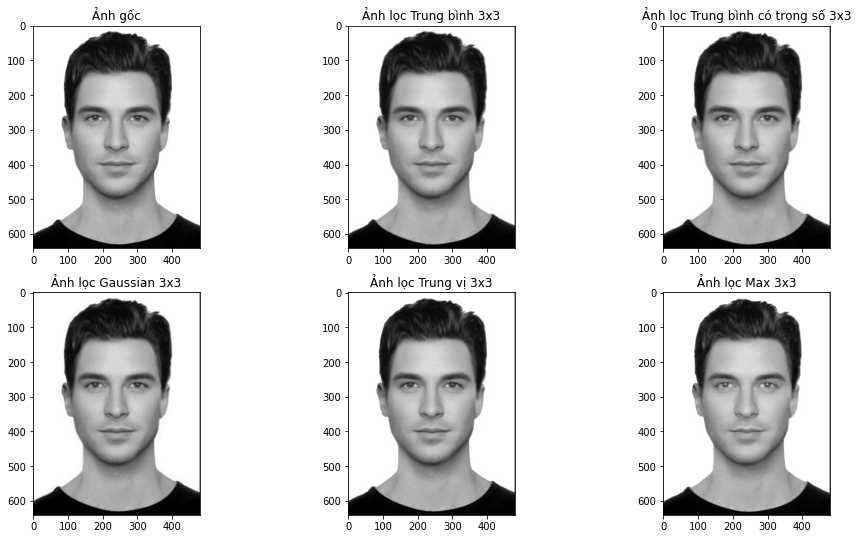

In [6]:
fig = plt.figure(figsize=(16, 9)) # Tạo vùng vẽ tỷ lệ 16:9
(ax1, ax2, ax3), (ax4, ax5, ax6) = fig.subplots(2, 3) # Tạo 6 vùng vẽ con

# Đọc và hiển thị ảnh gốc
image = cv2.imread('/content/m.jpg', 0)
ax1.imshow(image, cmap='gray')
ax1.set_title("Ảnh gốc")

# Lọc TB và hiển thị ảnh
imgTB3x3 = Tich_chap(image, locTB3x3) #Gọi hàm lọc
ax2.imshow(imgTB3x3, cmap='gray')
ax2.set_title("Ảnh lọc Trung bình 3x3")

# Lọc TB có trọng số và hiển thị ảnh
imgTB_TS_3x3 = Tich_chap(image, locTB3x3_trong_so) #Gọi hàm lọc
ax3.imshow(imgTB_TS_3x3, cmap='gray')
ax3.set_title("Ảnh lọc Trung bình có trọng số 3x3")

# Lọc Gaussian và hiển thị ảnh
imgGaussian_3x3 = Tich_chap(image, locGaussian3x3) #Gọi hàm lọc
ax4.imshow(imgGaussian_3x3, cmap='gray')
ax4.set_title("Ảnh lọc Gaussian 3x3")

# Lọc Trung vị và hiển thị ảnh
imgTV_3x3 = loc_trung_vi(image) #Gọi hàm lọc
ax5.imshow(imgTV_3x3, cmap='gray')
ax5.set_title("Ảnh lọc Trung vị 3x3")

imgmax_3x3 = loc_max(image) #Gọi hàm lọc
ax6.imshow(imgmax_3x3, cmap='gray')
ax6.set_title("Ảnh lọc Max 3x3")

# Hiển thị vùng vẽ
plt.show()